# <center> Mónika Farsang
## <center> Matrikelnumber 6007876    
# <center> Project work - Data Analysis of Enviromental and Lifestyle data
## <center> 13. 07. 2020

## Table of contents
My final project work consists of the following chapters:
### 1. Introduction 
    1.1. Data about environment 
    1.2. Data about lifestyle 
### 2. Methodology
    2.1 Statistical methods applied on my dataset
    2.2. Visualization with line plot
    2.3. Visualization with histograms
    2.4. Visualization with boxplots
### 3. Results
    3.1. Results of time-dependent data
    3.2. Results of time-independent data
### 4. Discussion

# 1. Introduction
In my final project I analyse the same dataset (Monika_Farsang_dataset.csv) that I used during this course. It consists of two bigger topics: time-dependent data about our environment and time-independent data about lifestyle and wellbeing. In this chapter I would like to provide a short introduction and context of my data in order to give you a better overview of my dataset and my goals.

## 1.1. Data about environment
My dataset starts with the time-dependent variables, this part of my dataset is from the NASA Global Climate Change website: https://climate.nasa.gov/vital-signs/. It begins with the global surface temperature between 1880 and 2019  (source: https://climate.nasa.gov/vital-signs/global-temperature/). This has raw values and smooth values as well for each timestamp. The following two parts are the monthly CO2 concentration from January 1958 to April 2020 and the arctic see ice extent from 1979 to 2019. The former one (source:  https://climate.nasa.gov/vital-signs/carbon-dioxide/) is the atmospheric carbon dioxide levels measured at Mauna Loa Observatory, in Hawaii. The latter (source: https://climate.nasa.gov/vital-signs/ice-sheets/) provides the data of the land ice sheets in Antarctic from NASA's GRACE and GRACE Follow-On satellites.  
\
My goal is to inverstigate this part of the dataset to present whether there is indeed a strong correlation between these environmental aspects about the global climate change.


## 1.2. Data about lifestyle
The remaining part is time-independent: a dataset from Kaggle was used, which is the Lifestyle and Wellbeing dataset (source: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data). Originally it contains 12757 survey responses with 23 attributes describing the daily habits. I have reduced it to 500 responses with 5 attributes: daily fruit or veggies, daily stress, number of close friends, number of social interactions per day and sleeping hours. These are numeric values between 0-5 in the first two cases (in case of stress: 0 means no stress, 5 means a stressful life) and between 0-10 in the remaining ones. \
\
I am examining this dataset with the choosen attributes because I find this topic really fascinating and would like to get a good overview about these lifestyle aspects and their correlation.


# 2. Methodology

In this chapter I visualize and describe the statistical methods that was applied on my dataset.

### Importing library and prepare data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting the sizes of the figures for seaborn
sns.set(rc={'figure.figsize':(16, 8)})

# Loading the csv file
file = "Monika_Farsang_dataset.csv"
df = pd.read_csv(file)

# Creating smaller dataframes for the temperature values
# Droping NaN values, creating datetime format and setting it to index
data_temp = df[['Year for temperature difference', 'Annual temp difference (°C)',
       'Annual temp difference smooth (°C)']].dropna()
data_temp['Year for temperature difference'] = pd.to_datetime(data_temp['Year for temperature difference'], format='%Y')
data_temp.set_index('Year for temperature difference')

# Creating smaller dataframes for CO2 emission values
# Droping NaN values, creating datetime format and setting it to index
data_CO2 = df[['Year.Month for CO2', 'CO2 (ppm)']].dropna()
data_CO2['Year.Month for CO2'] = pd.to_datetime(data_CO2['Year.Month for CO2'], format='%Y.%m.%d')
data_CO2.set_index('Year.Month for CO2')

# Creating smaller dataframes for the ice extent values
# Droping NaN values, creating datetime format and setting it to index
data_ice = df[['Year for Arctic sea ice extent', 'Arctic sea ice extent (million square km)']].dropna()
data_ice['Year for Arctic sea ice extent'] = pd.to_datetime(data_ice['Year for Arctic sea ice extent'], format = '%Y')
data_ice.set_index('Year for Arctic sea ice extent');

## 2.1. Statistical methods applied on my dataset

The first statistical method that I applied on my dataset is the minimum function. This returns the minimum value of each column in the dataset.

In [2]:
df.min()

Year for temperature difference                    1880
Annual temp difference (°C)                       -0.48
Annual temp difference smooth (°C)                -0.41
Year.Month for CO2                           1958.03.01
CO2 (ppm)                                        314.62
Year for Arctic sea ice extent                     1979
Arctic sea ice extent (million square km)          3.57
Person ID number                                  10001
Daily fruit/veggies                                   0
Daily stress (0-5)                                    0
Number of close friends                               0
Number of social interactions per day                 0
Sleeping hours                                        3
dtype: object

Next, the maximum function was applied, which returns the maximum value of each column. This with the previous min() method gives an overview of the range of the dataset.

In [3]:
df.max()

Year for temperature difference                    2019
Annual temp difference (°C)                        1.02
Annual temp difference smooth (°C)                 0.98
Year.Month for CO2                           2020.04.01
CO2 (ppm)                                        413.38
Year for Arctic sea ice extent                     2019
Arctic sea ice extent (million square km)          7.67
Person ID number                                  10500
Daily fruit/veggies                                   5
Daily stress (0-5)                                    5
Number of close friends                              10
Number of social interactions per day                10
Sleeping hours                                       10
dtype: object

After the minimum and maximum values in each input are known, it is important to see what are the average values.

In [4]:
df.mean()

Year for temperature difference               1949.500000
Annual temp difference (°C)                      0.042786
Annual temp difference smooth (°C)               0.042929
CO2 (ppm)                                      355.107627
Year for Arctic sea ice extent                1999.000000
Arctic sea ice extent (million square km)        6.067317
Person ID number                             10250.500000
Daily fruit/veggies                              3.178000
Daily stress (0-5)                               2.688000
Number of close friends                          5.518000
Number of social interactions per day            6.178000
Sleeping hours                                   7.132000
dtype: float64

Another intersting aspect is to get information about the standard deviation.  If the value is low, the values are close to the mean and if it is high, the values are spread out over a wider range.

In [5]:
std_ds = np.std(df)
print(std_ds)

Year for temperature difference               40.413488
Annual temp difference (°C)                    0.348269
Annual temp difference smooth (°C)             0.337356
CO2 (ppm)                                     28.499280
Year for Arctic sea ice extent                11.832160
Arctic sea ice extent (million square km)      1.102549
Person ID number                             144.337279
Daily fruit/veggies                            1.458189
Daily stress (0-5)                             1.309449
Number of close friends                        2.952571
Number of social interactions per day          3.134696
Sleeping hours                                 1.250030
dtype: float64


For the time-independent columns the following table shows the mode values, which are the most common values for each column.

In [6]:
df1 = df[['Daily fruit/veggies', 'Daily stress (0-5)', 'Number of close friends', 'Number of social interactions per day', 'Sleeping hours']]
df1.mode()

,Daily fruit/veggies,Daily stress (0-5),Number of close friends,Number of social interactions per day,Sleeping hours
0,5.0,2.0,10.0,10.0,7.0


## 2.2. Visualization with line plot

This line plot, which is a standard statistical technique for plotting time series data, displays the real and the smoothed annual temperature difference values. 

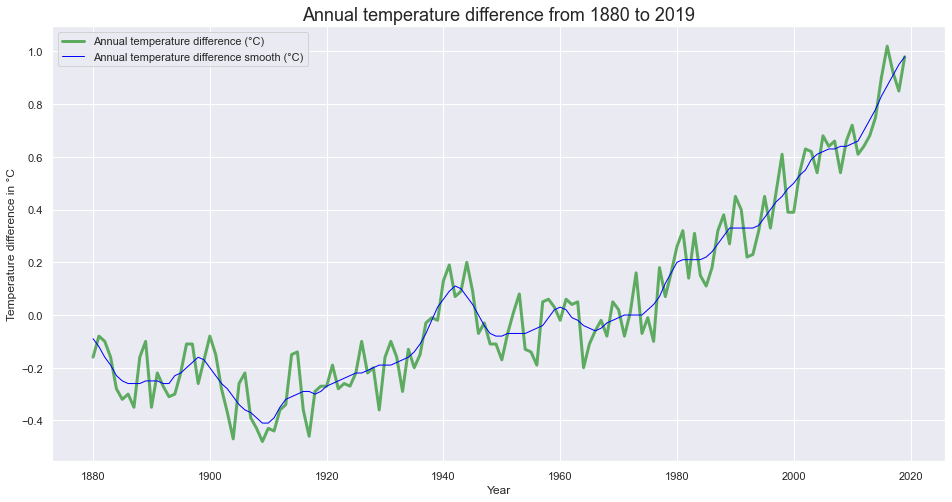

In [7]:
# Line plot for the Annual temperature difference real and smooth values during the years
plt.plot(data_temp["Year for temperature difference"], data_temp["Annual temp difference (°C)"], color= "green", linewidth=3, alpha = 0.6, label='Annual temp difference')
plt.plot(data_temp["Year for temperature difference"], data_temp["Annual temp difference smooth (°C)"], color= "blue", linewidth=1, label='Annual temp difference smooth')
plt.title('Annual temperature difference from 1880 to 2019', fontsize = 18)
plt.xlabel('Year')  
plt.ylabel('Temperature difference in °C')
plt.legend(['Annual temperature difference (°C)', 'Annual temperature difference smooth (°C)']);

## 2.3. Visualization with histograms

These histogram plots are for detecting the frequency of the values in the lifestyle dataset. It is useful to have a visual form of the data and it is easier to examine in which ranges the responses of the people interviewed fall.

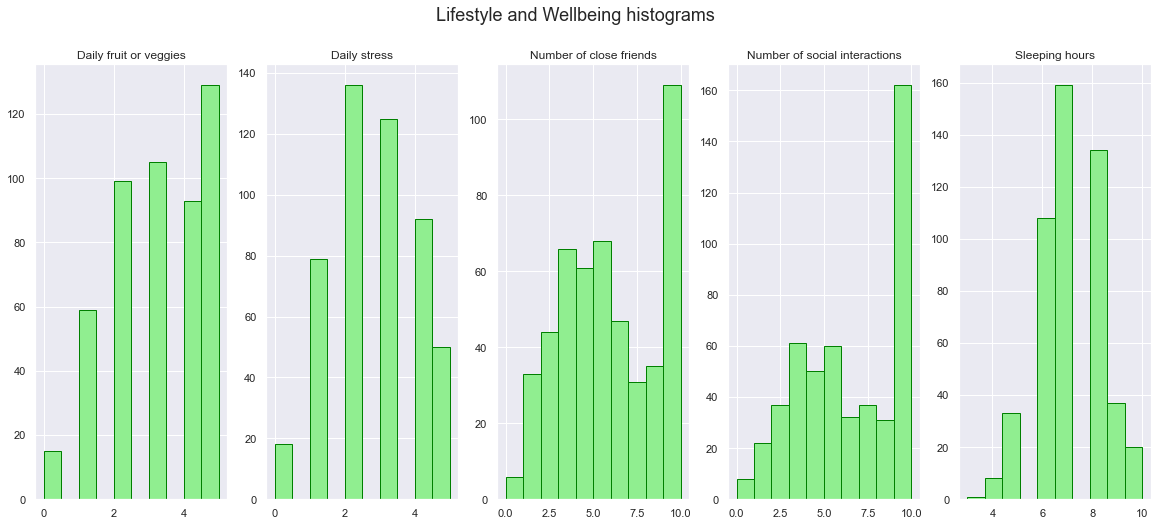

In [8]:
# Filtering data for each used column
fruit = df["Daily fruit/veggies"]  
data1 = fruit[~np.isnan(fruit)]

stress = df["Daily stress (0-5)"]
data2 = stress[~np.isnan(stress)]

friends = df["Number of close friends"]  
data3 = friends[~np.isnan(friends)]

social = df["Number of social interactions per day"]  
data4 = social[~np.isnan(social)]

sleep = df["Sleeping hours"]  
data5 = sleep[~np.isnan(sleep)]

# Defining the size of the whole figure
fig = plt.figure(figsize =(20,8))
plt.suptitle("Lifestyle and Wellbeing histograms", fontsize = 18)

# Histogram subplot for daily fruit or veggies
ax1 = fig.add_subplot(151)
ax1.hist(data1, facecolor = "lightgreen", edgecolor = "green")
ax1.set_title("Daily fruit or veggies")

# Histogram subplot for daily stress
ax2 = fig.add_subplot(152)
ax2.hist(data2, facecolor = "lightgreen", edgecolor = "green")
ax2.set_title("Daily stress")

# Histogram subplot for number of close friends
ax3 = fig.add_subplot(153)
ax3.hist(data3, facecolor = "lightgreen", edgecolor = "green")
ax3.set_title("Number of close friends")

# Histogram subplot for number of social interactions per day
ax4 = fig.add_subplot(154)
ax4.hist(data4, facecolor = "lightgreen", edgecolor = "green")
ax4.set_title("Number of social interactions")

# Histogram subplot for sleeping hours
ax5 = fig.add_subplot(155)
ax5.hist(data5, facecolor = "lightgreen", edgecolor = "green")
ax5.set_title("Sleeping hours");

## 2.4. Visualization with boxplots

The boxplot below gives information about the amount of daily fruit veggies, the daily stress, the number of close friends, the number of social interactions per day and the sleeping hours. Each box extends from the lower to upper quartile values of the given data with a line at the median. The whiskers extend from the box to show the range of our data.

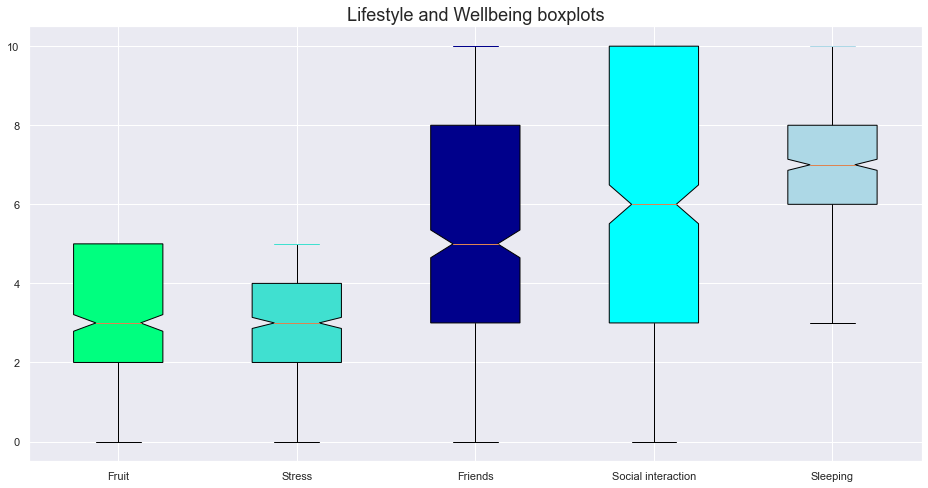

In [9]:
# Filtering data for each used column
fruit = df["Daily fruit/veggies"]  
data1 = fruit[~np.isnan(fruit)]

# Assigning the boxplot data
plt.title('Lifestyle and Wellbeing boxplots', fontsize= 18)
box_plot_data=[data1, data2, data3, data4, data5]

# Defining the colors
colors = ['springgreen', 'turquoise', 'darkblue', 'cyan', 'lightblue']
labels = ["Fruit","Stress","Friends","Social interaction","Sleeping"]

bp = plt.boxplot(box_plot_data, labels= labels,
                patch_artist = True, notch = True)

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor = colors[i])
    bp['caps'][2*i + 1].set(color = colors[i])


# Results

In this section I would like to present the findings that I have made, first with the time-dependent, then with the time-independent dataset.

## 3.1. Results of time-dependent data

The lineplot below displays the environmental observations about the temperature differences (including the smooth values), the Arctic sea ice extent and the CO2 emission from 1979 to 2020. It is easy to see, that all three trends are interrelated: as the CO2 emission rises, the global temperature rises as well and the Arctic sea ice extent decreases.

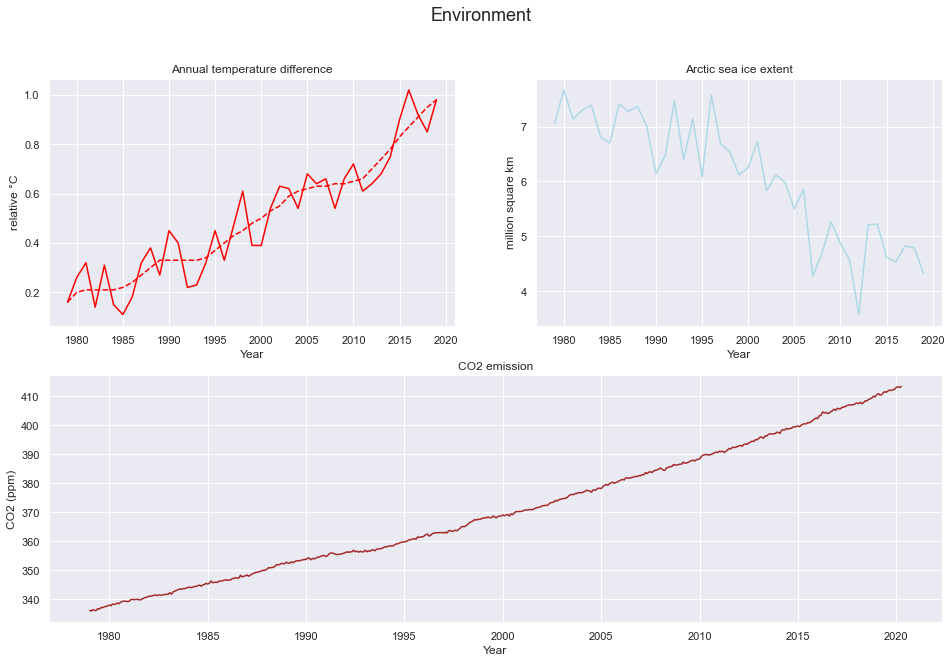

In [10]:
# Defining the size of the whole figure
fig = plt.figure(figsize =(16,10))
plt.suptitle("Environment", fontsize = 18)

# Creating plot ax1
ax1 = fig.add_subplot(221)
ax1.set_title("Annual temperature difference")
ax1.plot(data_temp['Year for temperature difference'].iloc[99:141],
        data_temp['Annual temp difference (°C)'].iloc[99:141],
        color = "red")
ax1.plot(data_temp['Year for temperature difference'].iloc[99:141],
        data_temp['Annual temp difference smooth (°C)'].iloc[99:141],
        color = "red", linestyle="dashed") 
ax1.set_xlabel("Year")
ax1.set_ylabel("relative °C")

# Creating plot ax2
ax2 = fig.add_subplot(222)
ax2.set_title("Arctic sea ice extent")
ax2.plot(data_ice['Year for Arctic sea ice extent'].iloc[0:401],
        data_ice['Arctic sea ice extent (million square km)'].iloc[0:401],
        color = "lightblue")
ax2.set_xlabel("Year")
ax2.set_ylabel("million square km")

# Creating plot ax3 
ax3 = fig.add_subplot(212)
ax3.set_title("CO2 emission")
ax3.plot(data_CO2["Year.Month for CO2"].iloc[-496:],
        data_CO2['CO2 (ppm)'].iloc[-496:],
        color = "brown")
ax3.set_xlabel("Year")
ax3.set_ylabel("CO2 (ppm)");

## 3.2. Results of time independent data

For the time-independent data the scatter plot is useful to observe the connection between the different aspects in life. 
This plot below shows the relation between the daily stress and the number of sleeping hours. As can be seen, with small number of sleeping hours the daily stress is tends to the higher values. An interesting observation is that with 8-10 hours sleep the daily stress do not shows reduced values. 

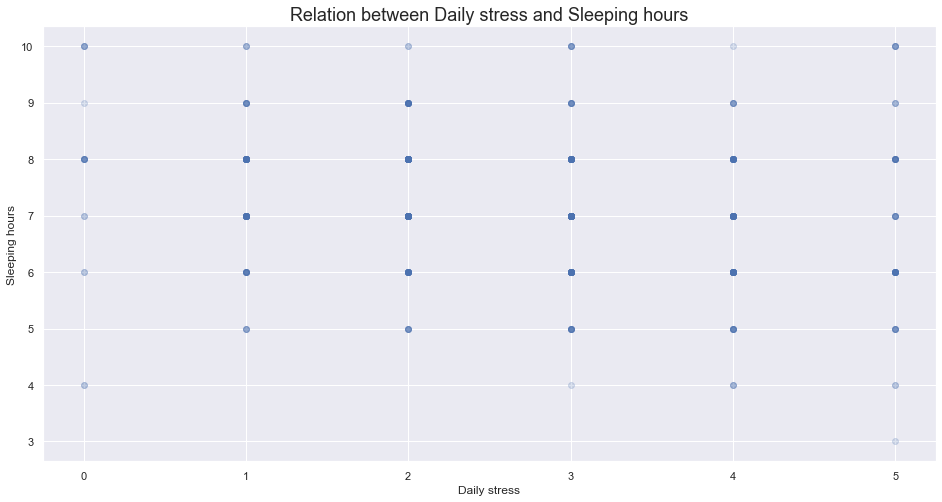

In [11]:
plt.scatter(df["Daily stress (0-5)"], df["Sleeping hours"], alpha=0.2)
plt.title('Relation between Daily stress and Sleeping hours', fontsize = 18)
plt.xlabel('Daily stress')
plt.ylabel('Sleeping hours')
plt.show()

After this, I would like to inspect two other aspects: the number of close friends on the number of daily social interactions. From this plot we can see that the more close friends you have, usually the more daily interactions you get. However, an interesting thing is that even with a small number of close friends you can get a high number of daily social interaction.

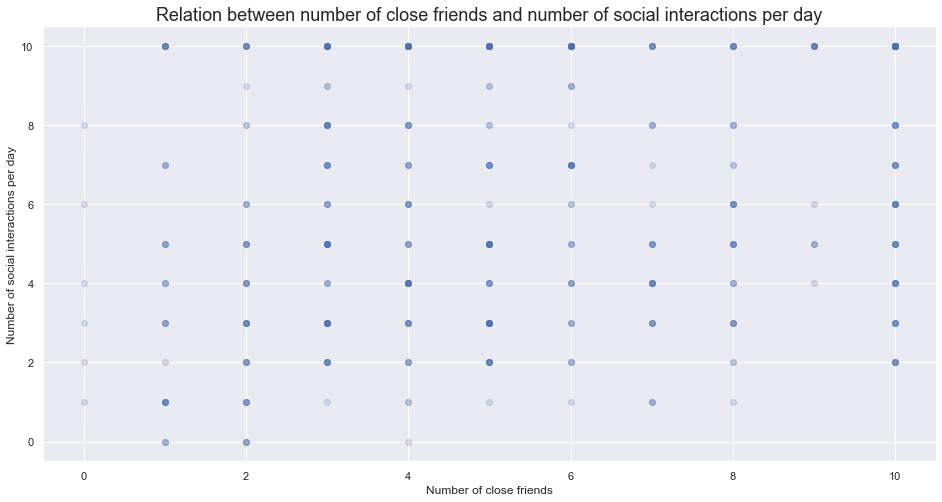

In [12]:
plt.scatter(df["Number of close friends"], df["Number of social interactions per day"], alpha=0.2)
plt.title('Relation between number of close friends and number of social interactions per day', fontsize = 18)
plt.xlabel('Number of close friends')
plt.ylabel('Number of social interactions per day')
plt.show()

# Discussion

In this chapter my goal is to discuss to results in the aforementioned context. The environmental part of my dataset is closely related to the global climate change. On one hand it can be seen clearly in the plot of the 3.2. point that the trends of the CO2 emission, the temperature and the declining ice extent are in connection with each other. On the other hand the plot below with the relative values and logarithmic scale shows that there are smaller ranges where the these aspects are not so closely interrelated. There may be a possible reason that there are other factors that should be invertigated. 

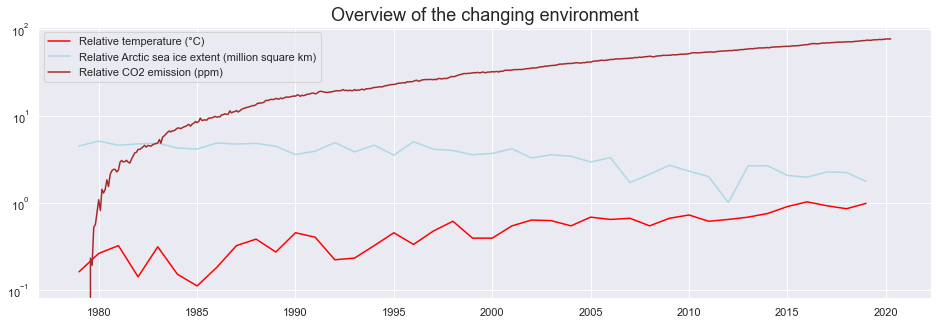

In [13]:
plt.figure(figsize =(16,5))
plt.title("Overview of the changing environment", fontsize = 18)

# Plotting the temperature differences
plt.plot(data_temp['Year for temperature difference'].iloc[99:141],
        data_temp['Annual temp difference (°C)'].iloc[99:141],
        color = "red")

# Plotting the relative Artic sea ice extent
plt.plot(data_ice['Year for Arctic sea ice extent'].iloc[0:401],
        data_ice['Arctic sea ice extent (million square km)'].iloc[0:401]-min(data_ice['Arctic sea ice extent (million square km)'].iloc[0:401]-1),
        color = "lightblue")

# Plotting the relative CO2 emission
plt.plot(data_CO2["Year.Month for CO2"].iloc[-496:],
        data_CO2['CO2 (ppm)'].iloc[-496:]-min(data_CO2['CO2 (ppm)'].iloc[-496:])-1,
        color = "brown")

# Adding logarithmic scale and legend
plt.yscale("log")
plt.legend(['Relative temperature (°C)','Relative Arctic sea ice extent (million square km)','Relative CO2 emission (ppm)']);

As regards the other half of the data with the lifestyle and wellbeing, it is intersting to notice that there are no specific strong relation among topics that could basically be expected. By this I mean that although there is a small correlation between the daily stress and the sleeping hours, and the number of close friends and the number of interaction, there are a lot of cases where they do not depend on each other. It is actually understandable as every person lives a little differently, other factors affect their lives. Here, as above in the environmental dataset, it should be considered to add more aspects to them to get a more complex overview. 